# Solsystemet

# 1. Hensikt

Vi skal utforske om vi klarer å lage en modell av et solsytem ved hjelp av differensiallikninger og gitte startvariabler

# 2. Teori

Å finne differensiallikningene for planetene

 Newtons universelle gravitasjonslov sier at kraften som virker mellom to legemer er gitt ved:
 
 $F_x = - \frac{G*m_1*m_2*x( t)}{r^3}$ og $F_y = - \frac{G*m_1*m_2*y( t)}{r^3}$
 
 Hvis vi ser på dette i forbindelse med planeter vil kraften virke i en y-retning og en x-retning. En planet med masse m2 vil påvirke en planet med masse m1 med kreftene Fx og Fy der r er avstanden mellom disse to planetene. Her vil x(t) og y(t) være posisjonene til planetene. For å finne disse verdiene kan vi bruke eulers metode, men da må vi finne en derivert i en orden til x(t) og y(t). Vi vet at disse funksjonene viser posisjon, vi vet også at den dobbeltderiverte av endring i posisjon vil være akelerasjon. Vi bruker dermed newtons 2. lov for å finne akselerasjonen:
 
 $ \sum F = m_1  a$
 
 Vi finner uttykket for akselerasjonen:
 
 $ a = \frac{\sum F}{m_1} $
 
 og setter inn uttryket for kraften for f:
 
 $ a_x = F_x = - \frac{G*m_1*m_2*x( t)}{r^3*m_1} $
 
 $ a_y = F_x = - \frac{G*m_1*m_2*x( t)}{((x(t)_2-x(t)_2)^2+(y(t)-y(t)_2)^2)^\frac{3}{2}*m_1} $
 
 Vi forkorter uttrykket, dermed har vi at:
 
 $ x''(t) = a(t)_x = F_x = - \frac{G*m_2*x( t)}{r^3} $
 
 $ y''(t) = a(t)_y = F_x = - \frac{G*m_2*y( t)}{r^3} $
 
 Dette vil dermed være en differensiallikning i andre orden, for at et konstantledd ikke skal forsvinne trenger vi dermed også utrykket for den deriverte av x(t) og y(t). Dette tilsvarer farten.

 $x'(t) = v_x(t)$
 
 $y'(t) = v_y(t)$
 
 Vi gjør om utrykket vi fikk av akselerasjonen til å gi et uttrykk i sammenheng med farten. Vi vet at akselerasjonen tilsvarer den deriverte av farten:
 
 $ v'(t) = a(t)_x = F_x = - \frac{G*m_2*x( t)}{r^3} $
 
 $ v'(t) = a(t)_y = F_x = - \frac{G*m_2*y( t)}{r^3} $
 
 Tilslutt må vi finne et uttrykk for lengden mellom planetene, r. Hvis vi ser på posisjonene til planetene kan vi lage en vektor mellom disse punktene, vi finner lengden til denne vektoren for å finne et utrrykk for r:
 
 Dette er punktene til planetene der y og x er kordinatene til den første planeten og x_2 og y_2 er posisjonen til planeten som påvirker den første planeten:
 
 
$(x(t), y(t))$ til $(x_2(t), y_2(t))$.

 Lengden til vektoren vil dermed være:

 $ r = ((x(t)-x_2(t))^2+(y(t)-y_2(t))^2)^\frac{1}{2} $
 
 Setter dette inn i differensiallikningen vår:
 
 $ v'(t) = a(t)_x = F_x = - \frac{G*m_2*x( t)}{((x(t)-x_2(t))^2+(y(t)-y_2(t))^2)^\frac{3}{2}} $
 
 $ v'(t) = a(t)_y = F_x = - \frac{G*m_2*y( t)}{((x(t)-x_2(t))^2+(y(t)-y_2(t))^2)^\frac{3}{2}} $

 Vi kan nå bruke disse likningene for å finne verdier av x(t) og y(t) for å finne posisjonen til planeten:
 
 $x'(t) = v_x(t)$

 $y'(t) = v_y(t)$

 $ v'(t) = a(t)_x = F_x = - \frac{G*m_2*x( t)}{((x(t)-x_2(t))^2+(y(t)-y_2(t))^2)^\frac{3}{2}} $
 
 $ v'(t) = a(t)_y = F_x = - \frac{G*m_2*y( t)}{((x(t)-x_2(t))^2+(y(t)-y_2(t))^2)^\frac{3}{2}} $

# Modell 1

# Eulers metode med sola og jorda

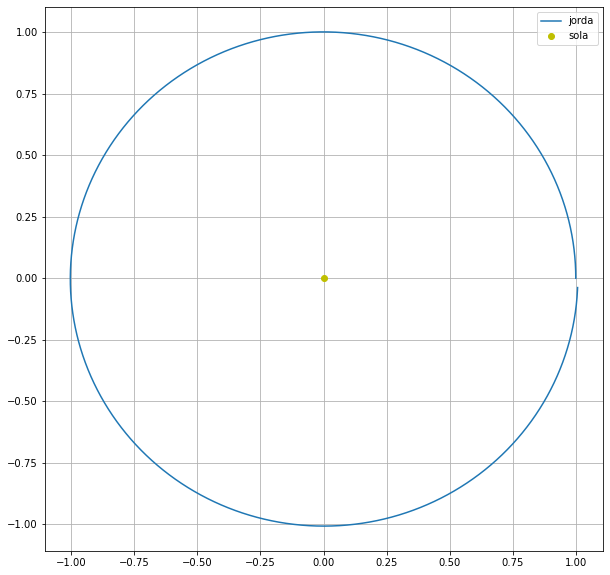

In [8]:
from matplotlib import *
import pylab as plt
import math

# Setter inn verdiene for gravitasjonskonstanten, solen(m2) og jorda(m1)
G = 4*math.pi**2
m2 = 1
m1 = 3 * 10**-6


#Bruker eulersmetode, men her må jeg kjøre den to ganger, en for den dobbeltdriverte og en for den deriverte- siden vi har en differensiallikning i andre orden.''''''
#Her vil t være tiden, funkX være en verdi x(t), derX være en verdi for x'(t)
#funkY være en verdi y(t), derY være en verdi for y'(t), delta er deltaX og n ant ganger vi skal kjøre metoden.
def eulersmetode(t, funkX, derX, funkY, derY, delta, n):
    
#Setter inn en liste for tid, posisjon og fart til planeten som vi finner vha eulers metode
    tid = []
    
    xPos = []
    xFart = []
    
    yPos = []
    yFart = []
    
#Setter inn verdiene for tid, fart og posisjon    

    a = t
    
    funk1 = funkX
    der1 = derX
    
    funk2 = funkY
    der2 = derY
    
    #Lager en dictinary for å kalle på de riktige funksjonene
    funksjon1 = {a:funk1}
    funksjon2 = {a:funk2}
    
#Definerer differensiallikningene    
    def vX(x, y):
        return -((G*m2*x)/(x**2+y**2)**(3/2))

    def vY(x, y):
        return -((G*m2*y)/(x**2+y**2)**(3/2))
    
#Lager en for løkke der vi utfører eulersmetode, en gang for posisjonen og en gang for farten som vi bruker til å finne posijsonen.
    for i in range(n):
        tid.append(a)
        xPos.append(funk1)
        yPos.append(funk2)
        xFart.append(der1)
        yFart.append(der2)
        funksjon1[a] = funk1
        funksjon2[a] = funk2
        
        funk1 = funk1 + der1*delta
        funk2 = funk2 + der2*delta
        der1 = der1 + vX(funksjon1[a],funksjon2[a])*delta
        der2 = der2 + vY(funksjon1[a],funksjon2[a])*delta
        a = a + delta
    
    
#Plotter verdiene vi fikk av posisjonene til jorda, forstørrer og legger til rutenett i tilleg.
    plt.figure(figsize=(10,10))
    plt.grid("on")
    plt.plot(xPos,yPos, label = "jorda")
    plt.plot(0,0,"yo", label = "sola")
    plt.legend()
    plt.show()
    
    
#Vi tester oss fram og finner at 1000 kjøringer ca tilsvarer et år    
eulersmetode(0, 1, 0, 0, 2*math.pi, 0.0001, 10000)

# Modell 2

# Finne posisjon via Euler-cromer

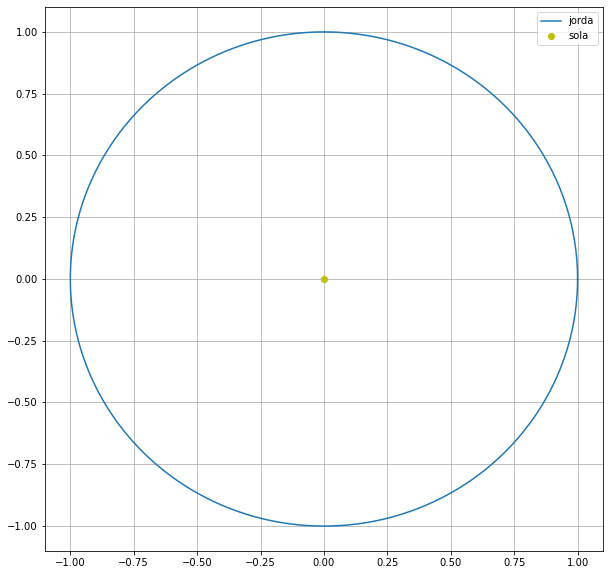

In [9]:
from matplotlib import *
import pylab as plt
import math

G = 4*math.pi**2
m2 = 1
m1 = 3 * 10**-6

sX = [0]
sY = [0]


def eulersmetode(t, funkX, derX, funkY, derY, delta, n):
    
    tid = []
    
    xPos = []
    xFart = []
    
    yPos = []
    yFart = []
    
    a = t
    
    funk1 = funkX
    der1 = derX
    
    funk2 = funkY
    der2 = derY
    
    funksjon1 = {a:funk1}
    funksjon2 = {a:funk2}
    
    def vX(x, y):
        return -((G*m2*x)/(x**2+y**2)**(3/2))

    def vY(x, y):
        return -((G*m2*y)/(x**2+y**2)**(3/2))
    
    for i in range(n):
        tid.append(a)
        xPos.append(funk1)
        yPos.append(funk2)
        xFart.append(der1)
        yFart.append(der2)
        funksjon1[a] = funk1
        funksjon2[a] = funk2
        
        #Bytter om rekkefølgen av hvordan man lager variablene slik at man finner den deriverte før funksjonsverdien
        
        der1 = der1 + vX(funksjon1[a],funksjon2[a])*delta
        der2 = der2 + vY(funksjon1[a],funksjon2[a])*delta
        funk1 = funk1 + der1*delta
        funk2 = funk2 + der2*delta
        a = a + delta
    
    plt.figure(figsize=(10,10))
    plt.grid("on")
    plt.plot(xPos,yPos, label = "jorda")
    plt.plot(0,0,"yo", label = "sola")
    plt.legend()
    plt.show()
    
    
    
eulersmetode(0, 1, 0, 0, 2*math.pi, 0.0001, 10000)

# Modell 3

# plotter flere planeter:

In [2]:
import matplotlib.pyplot as plt
import math
from pylab import *

# henter først startverdiene
itr = loadtxt("planeter_data.dat", dtype = int, skiprows = 0, max_rows = 1)
data = loadtxt("planeter_data.dat", dtype = str, skiprows = 1, delimiter = " ")

planeter = []

#Legger disse inn i en matrise
for i in range(5):
    planeter.append(data[:, i])

# Vi definerer G
G = 4*math.pi**2

# Vi definerer eulers metode
def euler(x0, y0, delta, n, v_x0, v_y0):
    tider = []
    a = 0

    xPos = []
    xVel = []
    yPos = []
    yVel = []
    
    def vx(y, x):
        return -((G*x)/(x**2+y**2)**(3/2))

    def vy(y, x):
        return -((G*y)/(x**2+y**2)**(3/2))

    for i in range(n):
        tider.append(a)
        
        xPos.append(x0)
        yPos.append(y0)
        xVel.append(v_x0)
        yVel.append(v_y0)
        
        x0 += v_x0*delta
        y0 += v_y0*delta
        
        v_x0 += vx(y0+delta, x0+delta)*delta
        v_y0 += vy(y0+delta, x0+delta)*delta
              
        a += delta
    plt.plot(xPos, yPos)
    plt.grid()
    return xPos, yPos

plt.figure(figsize = (10,10))


kalkulasjoner = []

#Tegner grafene for alle planetene
for i in range(itr):
    xPoints, yPoints = euler(float(planeter[1][i]),float(planeter[2][i]),0.001,1000,float(planeter[3][i]),float(planeter[4][i]))

plt.grid()
plt.show()

OSError: planeter_data.dat not found.

# Modell 4

# Vi modellerer alle planetene parallellt:

In [4]:
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from pylab import *

# Her defininerer vi noen konstanter
force_m = 4
G = 4*math.pi**2

# Her laster vi inn data fra datasettet
itr = loadtxt("planeter_data.dat", dtype = int, skiprows = 0, max_rows = 1)
data = loadtxt("planeter_data.dat", dtype = str, skiprows = 1, delimiter = " ")

# Vi lager så en matrise som inneholder alle planetdataene, hvis vi vil legge til flere planeter må vi endre ant ganger denne løkken kjører som tilsvare antall planeter
planeter = []
for i in range(6):
    planeter.append(data[:, i])

# Her lagrer vi startverdiene i en temporær matrise hvor vi kommer til å lagre kalkuleringene
temp = []
for i in range(itr):
    p = [float(planeter[1][i]), float(planeter[2][i]), float(planeter[3][i]), float(planeter[4][i])]
    temp.append(p)

# Her lages det en matrise som legger inn i listene listene ved å utregnede X og Y posisjoner for hver planet
kalkulasjoner = [[] for x in range(itr)]
for i in range(len(kalkulasjoner)):
    for y in range(2):
        kalkulasjoner[i].append([])

#Definerer noen funksjoner som regner ut kraft-påvirkningen fra alle andre planeter.
def xForce(p):
    tot = 0
    for i in range(itr):
        if i == p: 
            continue # Vi sørger for at dersom løkken tar for seg planeten som utregners, så hopper den over resten av koden og kjører på nytt
        
        m1 = float(planeter[5][p])
        m2 = float(planeter[5][i])
        x = temp[i][0]-temp[p][0]
        y = temp[i][1]-temp[p][1]
        r = (x**2+y**2)**(3/2)
        tot += (G*(m1*m2*x)/r)*(10**force_m) # For å rekne ut påvirkningen fra andre planeter, gjør vi det samme som med sola, bare endrer massene 
    return tot

def yForce(p):
    tot = 0
    for i in range(itr):
        if i == p:
            continue
        m1 = float(planeter[5][p])
        m2 = float(planeter[5][i])
        x = temp[i][0]-temp[p][0]
        y = temp[i][1]-temp[p][1]
        r = (x**2+y**2)**(3/2)
        tot += (G*(m1*m2*y)/r)*(10**force_m) # Her gjør vi det samme for å regne ut kraften i y retningen
        
    return tot

# Definerer selve euler metoden
def euler(delta, n):
    tider = []
    a = 0

    def vx(y, x, p): # Her regner vi ut påvirkningen på planeten fra fra solen i x retningen
        F_sol = -((G*x)/(x**2+y**2)**(3/2)) # Vi forkorter utrykket siden massen til solen er 1 solmasse
        F_tot = xForce(p) + F_sol # Vi summerer akselerasjonen for x-retningen
        return F_tot

    def vy(y, x, p): # Her regner vi ut påvirkningen på planeten fra fra solen i x retningen
        F_sol = -((G*y)/(x**2+y**2)**(3/2)) # Vi forkorter utrykket siden massen til solen er 1 solmasse
        F_tot = yForce(p) + F_sol # Vi summerer akselerasjonen for y-retningen
        return F_tot

    for i in range(n):
        tider.append(a)
        
        for p in range(itr):
            temp[p][0] += temp[p][2]*delta
            temp[p][1] += temp[p][3]*delta
        
            temp[p][2] += vx(temp[p][1], temp[p][0]+delta, p)*delta
            temp[p][3] += vy(temp[p][1], temp[p][0]+delta, p)*delta
            
            for i in range(2):
                kalkulasjoner[p][i].append(temp[p][i])
              
        a += delta

def plot(delta, i):
    euler(delta, i)
    for p in range(itr):
        plt.plot(kalkulasjoner[p][0], kalkulasjoner[p][1])

plt.figure(figsize = (10,10))
plot(0.001, 2000)
plt.grid()


OSError: planeter_data.dat not found.

# Modell 5

# PYGAME

In [1]:
import pygame as pg
import math
from pylab import *
pg.init()

x_size = 800
y_size = 500

orbitScale = 100
offsetx = 0
offsety = 0

win = pg.display.set_mode((x_size, y_size))
pg.display.set_caption("Solsystem simulering")
clock = pg.time.Clock()

# Dette er en variabel som kan endres for å oppnå sterkere eller svakere gravitasjonskraft mellom alle legmene. 
force_m = 1

# Denne påvirker bare planetene
force_p = 1

# Her defininerer jeg gravitasjonskonstanten for differensiallikningen
G = 4*math.pi**2

# Her lastes inn data fra datasettet
itr = loadtxt("planeter_data.dat", dtype = int, skiprows = 0, max_rows = 1)
data = loadtxt("planeter_data.dat", dtype = str, skiprows = 1, delimiter = " ")

# lager en matrise som inneholder alle planetdataene
planeter = []
for i in range(6):
    planeter.append(data[:, i])

# Her lagres startverdiene i en temporær matrise hvor kommer til å lagre kalkuleringene
temp = []
for i in range(itr):
    p = [float(planeter[1][i]), float(planeter[2][i]), float(planeter[3][i]), float(planeter[4][i])]
    temp.append(p)

# Her lager vi en matrise hvor vi kan lagre listene med utregnede X og Y posisjoner for hver planet
kalkulasjoner = [[] for x in range(itr)]
for i in range(len(kalkulasjoner)):
    for y in range(2):
        kalkulasjoner[i].append([])

# definerer noen funksjoner som skal regne ut akselerasjon-påvirkningen fra alle andre planeter.
def xForce(p):
    tot = 0
    for i in range(itr):
        if i == p: 
            continue #sørger for at dersom løkken tar for seg planeten som utregners
        
        m1 = float(planeter[5][p])
        m2 = float(planeter[5][i])
        x = temp[i][0]-temp[p][0]
        y = temp[i][1]-temp[p][1]
        r = (x**2+y**2)**(3/2)
        tot += (G*(m1*m2*x)/r)*(10**force_p) # For å regne ut påvirkningen fra andre legmer, bruker vi den andre-deriverte av newtowns universielle gravitasjonslov
    return tot

def yForce(p):
    tot = 0
    for i in range(itr):
        if i == p:
            continue
        m1 = float(planeter[5][p])
        m2 = float(planeter[5][i])
        x = temp[i][0]-temp[p][0]
        y = temp[i][1]-temp[p][1]
        r = (x**2+y**2)**(3/2)
        tot += (G*(m1*m2*y)/r)*(10**force_p) # Her gjøres det samme for å regne ut akselerasjonen i y retningen
        
    return tot

# Her defineres selve euler metoden
tidssteg = []
def euler(delta, n):
    a = 0

    def vx(y, x, p): # Her regner vi ut påvirkningen på planeten fra fra solen i x retningen
        F_sol = -((G*x)/(x**2+y**2)**(3/2)) # forkorter utrykket siden massen til solen er 1 solmasse
        F_tot = xForce(p) + F_sol #summerer akselerasjonen for x-retningen
        return F_tot*force_m

    def vy(y, x, p): # Her regnes ut påvirkningen på planeten fra fra solen i x retningen
        F_sol = -((G*y)/(x**2+y**2)**(3/2)) # Forkorter utrykket siden massen til solen er 1 solmasse
        F_tot = yForce(p) + F_sol #summerer akselerasjonen for y-retningen
        return F_tot*force_m

    for i in range(n):
        tidssteg.append(a)
        a += 1
        for p in range(itr): # Her kjører eulers metode først en gang for x og y for planet p for å finne posisjonen
            temp[p][0] += temp[p][2]*delta
            temp[p][1] += temp[p][3]*delta
        
            temp[p][2] += vx(temp[p][1], temp[p][0]+delta, p)*delta # Og så kjøres eulers metode en gang til for x og y for planet p for å finne farten
            temp[p][3] += vy(temp[p][1], temp[p][0]+delta, p)*delta

            for i in range(2):
                kalkulasjoner[p][i].append(temp[p][i]) # Her utregnes x og y i en matrise for utregningene
                      
euler(0.001, 1000) # Her kjøres eulermetoden med gitt parametere

def lagKoordinater():
    koord = []
    for i in range(itr):
        koord.append([]) # For hver planet lages det en liste med X og Y koordinater som pygame senere klarer å lese.
        for p in range(len(kalkulasjoner[i][0])):  
            # Under lages det koordinatene til pygame og multipliserer med zoom verdien og legger til et offset som kontrollers med piltastene.
            koord[i].append((int(kalkulasjoner[i][0][p]*orbitScale+x_size//2+offsetx), int(kalkulasjoner[i][1][p]*orbitScale+y_size//2+offsety)))
    return koord

        
run = True
tid = 0
while run:
    clock.tick(10000)
    koordinater = lagKoordinater() #
    tid += 1 # inkrementerer tiden med én for hver gang løkken kjører, dette gjør slik at vi kan visualisere planeten i banen.
    if tid >= 1000:
        tid = 0
    
    for event in pg.event.get():
        if event.type == pg.QUIT:
            run = False
                
    keys = pg.key.get_pressed() # får knappetrykk fra tastaturet
    
    if keys[pg.K_LEFT]:
        offsetx += 4
    elif keys[pg.K_RIGHT]:
        offsetx -= 4
    elif keys[pg.K_UP]:
        offsety += 4
    elif keys[pg.K_DOWN]:
        offsety -= 4
    elif keys[pg.K_z]:
        orbitScale += 4
    elif keys[pg.K_x]:
        orbitScale -= 4
    
    win.fill(pg.Color("black"))
    pg.draw.circle(win, pg.Color("yellow"), (x_size//2+offsetx, y_size//2+offsety) , 5) # tegner sola
    
    for i in range(itr):
        pg.draw.lines(win, pg.Color("white"), False, koordinater[i]) # tegner banene
        pg.draw.circle(win, pg.Color("red"), (koordinater[i][tid][0], koordinater[i][tid][1]) , 2) # tegner planetene ved kordinatet i tiden
        
    pg.display.update()

pg.quit()
quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# 4.Diskusjon

# Modell 1 

Her ser jeg at verdiene man får ikke vil være helt nøyaktige siden det ikke blir en perfekt sirkel. Hvis man bruker eulercromer istedet vil man kunne få et mer nøyaktig svar, siden dette funker bra til en differensiallikning i andre grad, ved at det integreres to ganger. Denne metoden går ut på at når jeg finner posisjonen til jorda i et gitt tidspunkt ved hjelp av eulers metode bruker man den deriverte, altså farten til det samme tidspunktet:
 
 $ x(t_{k+1}) = x(t) * v_x(t_{k+1})*\Delta t$
 
 $ y(t_{k+1}) = x(t) * v_y(t_{k+1})*\Delta t$

# Modell 2

Plottet er helt likt som det forrige plottet. Verdiene er helt like og vi har ikke fått endret på noe, utenom at vi brukte nå Euler-Cromer. Dette sier oss at begge måtene å regne ut på og plotte fungerer

# Modell 3

Denne koden er mer eller mindre lik den for kun jorda og sola. Jeg kjører bare eulermetoden med eulercromer for alle planetene etter hverandre. Som man ser på resultatet, kan banene fort være ufulstendige, dette bestemmes av antall tidssteg, n, kan vil bruke. Dette kan økes for å få en mer komplett bane. Jeg ser også at banen planeten vi har lagt til er veldig forksjellig fra resten, dette er fordi verdiene jeg har gitt ikke kommer fra faktisk data.

Jeg har nå modellert alle planetene og banene deres ved hjelp av eulers metode og initialbetingelsene i planeter_data.dat filen. Det neste man kan ønske å gjøre er å modellere banene og inkudere kraften som virker fra de andre planetene. For å gjøre dette, må jeg optimalisere måten man kan lagre utregningene og de midlertidige kalkulasjonene. For å oppnå dette uten å fylle en hel side med variabler, bruker vi matriser.

# Modell 4

Jeg ser at resultatet er ganske likt med og uten påvirkning fra andre planeter, dette tror jeg er realistisk ettersom de lave massene og store avstandene fort har svært liten påvirkning på planetene. jeg ser også at dersom vi øker force_m litt, får vi svært interessante resultater. Jeg ser også at antall baner rundt sola varierer veldig fra planet til planet og at noen baner ikke er fullført, dette kan være relativt realistisk ettersom planeter nærmere sola bruker kortere tid på en bane rundt solen. Det er også verdt å nevne at det er mulig å legge til flere planeter i dette programmet, da må vi endre en for-løkke som jeg har kommentert ovenfor. Jeg må også ha dataen til de ekstra planetene. Jeg har i dette programmet lagt til en ekstra planet. Jeg ser om denne planeten kan påvirke de andre planetene våre ved å øke massen. Jeg gjør dette og ser at banenen blir påvirket av dette, dermed kan jeg si at koden vår er vellykket. Dette kan du selv teste ved å endre den siste verdien til X planeten i filen planeter_data.dat med et høyere tall. Du kan også se hvordan plottet er uten den siste planeten ved å fjerne den siste planeten i data filen.





# Modell 5

Spillet viser en simulasjon av solsystemet. Spillet går ut på hvordan gravitasjonen og vi bruker eulers metode om hvordan den påvirker akselerasjonen til planetene. VI finner også gravitasjonskontstant ved hjelp av differanslikninger. Jeg syntes resultatet blir et helt greit program som visualereserer planetetene rundt sola. Vi må også huske at dette er en modell, så det finnes uendelige måter å lage en modell av det samme solsytmet. Skulle ønske jeg kunne fått til at Sola også kunne blitt påvirket av gravitasjonskreftene, men dete ble for vanskelig for meg å klare. 

# 5.Konklusjon

Nå har jeg vist at det er mulig å modellere baner i et solsystem ved å løse differensiallikningen av en modell som den andrederiverte av newtons universielle gravitasjonslov, og to startverdier, for å få en posisjon. Til ettertanke hadde det vært interessant om man hadde gjort at sola også kunne bli påvirket av gravitasjonskrefter, selv om endringen hadde vært minimal på grunn av den store massen.